# Libraries import
First we need to import necessary libraries

In [3]:
import adampy as adam
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Polygon definition

In [4]:
df = gpd.read_file('austria.geojson')
df.head()

,geometry
0,"POLYGON ((13.84552001953125 48.77067246880509,..."


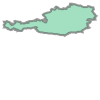

In [5]:
geom = df['geometry'][0]
geom

# Define function to plot our data

In [6]:
def plot_data(data, title, colorbar, crange):    
    fig = plt.figure(figsize=(16, 20))
    ax = plt.axes()

    im = ax.imshow(data*1000000, cmap = colorbar ,origin='upper', vmin= crange[0], vmax = crange[1])

    plt.title(title, size=20)

    fig.colorbar(im, ax=ax, orientation = 'horizontal',pad = 0.05)
    fig.patch.set_facecolor('xkcd:white')
    plt.show()

# Define functions to read, mask and cut the data

* we mask the data in order to 'translate' zero values to NaN
* we cut the data to the same size, which can vary

In [7]:
def read_data(date, collection):
    
    data, metadata = adam.getImage('wcs.top-platform.eu', collection, date, geometry = "austria.geojson", masking = True).get_data()
    data[np.where(data<1e-10)] = np.nan
    if data.shape[0]==77:
        data=data[1:,:]
        
    return data

# Read and plot data
according to definition (collection & date)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


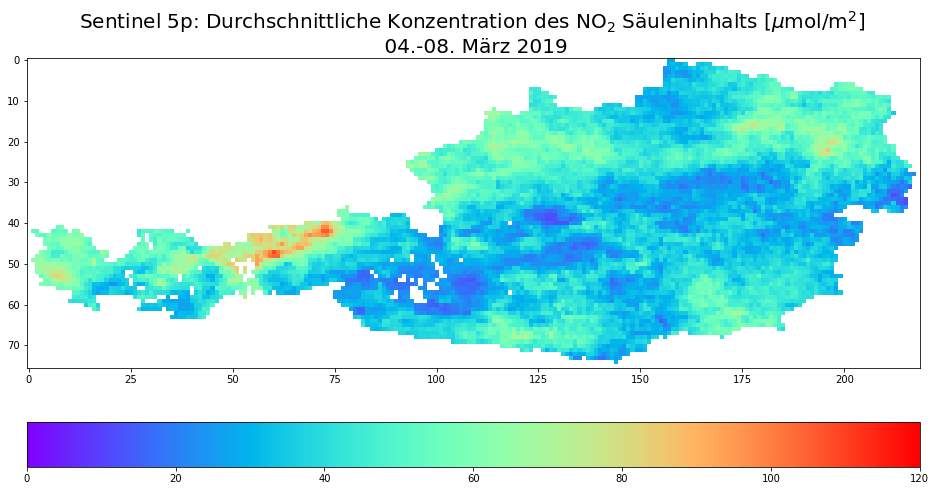

In [8]:
collection = 'vr_S5P_OFFL_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN_masked_50'
date = '2019-03-04T00:00:00,2019-03-08T23:59:59'
title = 'Sentinel 5p: Durchschnittliche Konzentration des NO$_{2}$ Säuleninhalts [$\mu$mol/m$^{2}$] \n 04.-08. März 2019'

data = read_data(date,collection)

plot_data(data, title,'rainbow', [0,120])

# Read, average and plot data
according to definition (collection & date)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Mean of empty slice
  # Remove the CWD from sys.path while we load stuff.


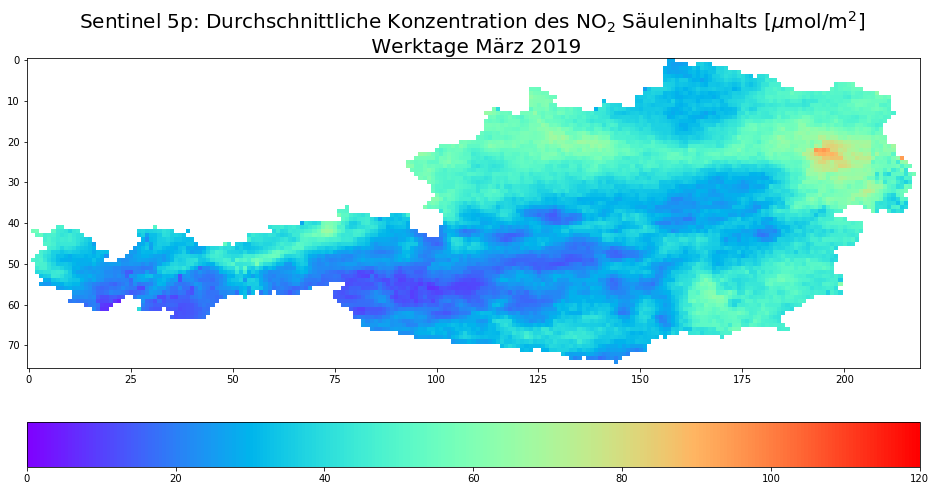

In [9]:
collection = 'vr_S5P_OFFL_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN_masked_50'
title = 'Sentinel 5p: Durchschnittliche Konzentration des NO$_{2}$ Säuleninhalts [$\mu$mol/m$^{2}$] \n Werktage März 2019'

data1 = read_data('2019-03-04T00:00:00,2019-03-08T23:59:59',collection)
data2 = read_data('2019-03-11T00:00:00,2019-03-15T23:59:59',collection)
data3 = read_data('2019-03-18T00:00:00,2019-03-22T23:59:59',collection)
data4 = read_data('2019-03-25T00:00:00,2019-03-29T23:59:59',collection)

data = np.asarray((data1, data2, data3, data4))
data = np.nanmean(data, axis=0)

plot_data(data, title,'rainbow', [0,120])

# Calculate difference and plot data
according to definition (collection & date)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


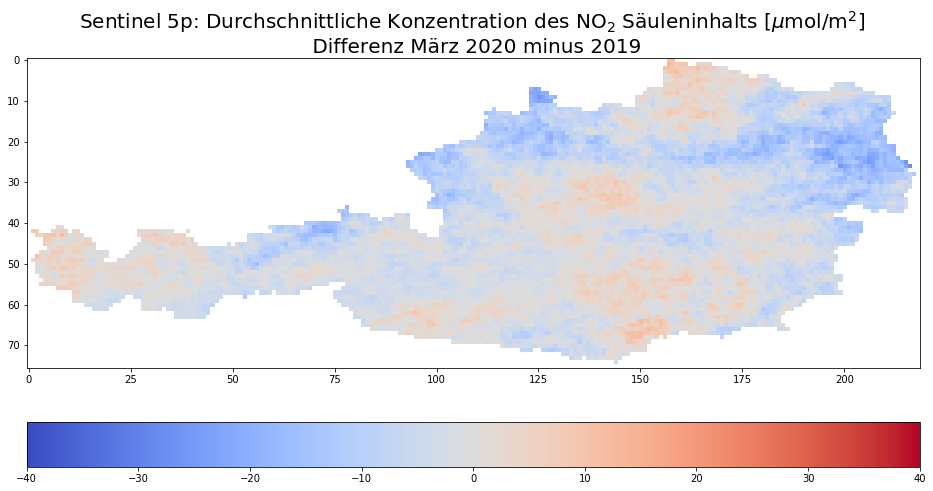

In [10]:
collection = 'vr_S5P_OFFL_L2_NO2_PRODUCT_NITROGENDIOXIDE_TROPOSPHERIC_COLUMN_masked_50'
title = 'Sentinel 5p: Durchschnittliche Konzentration des NO$_{2}$ Säuleninhalts [$\mu$mol/m$^{2}$] \n Differenz März 2020 minus 2019'

data1 = read_data('2019-03-01T00:00:00,2019-03-31T23:59:59',collection)
data2 = read_data('2020-03-01T00:00:00,2020-03-31T23:59:59',collection)

data = data2 - data1

plot_data(data, title,'coolwarm', [-40,40])